In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PROBLEM SET 1

Problem 9

In [38]:
#constantes
R = 8.314 #J/k.mol
H_al = 0
H_ni = 0

In [47]:
#subfunciones
def G_gamma_al(T):
    return -11278.378+(188.684153*T)-(31.748192*T*np.log(T))-(1.231e28*T**(-9))

def G_gamma_ni(T):
    return -5179.159+(117.854*T)-(22.096*T*np.log(T))-(0.004807*T**2)

def L_al_ni_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma
    return -168750+(16*T)+(30600*(x_al_gamma-x_ni_gamma))+(41700*(x_al_gamma-x_ni_gamma)**2)

def G_ni_al_gamma_prime(T):
    return (0.75*G_gamma_ni(T))-40000+(3*T)+(0.25*G_gamma_al(T))

In [48]:
#funciones
def G_m_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma

    G_m_ref_gamma = (x_al_gamma*(G_gamma_al(T)-H_al))+(x_ni_gamma*(G_gamma_ni(T)-H_ni))
    
    x_al_safe = np.maximum(x_al_gamma, 1e-10)
    x_ni_safe = np.maximum(x_ni_gamma, 1e-10)
    G_m_ent_gamma = R * T * (x_al_safe * np.log(x_al_safe) + x_ni_safe * np.log(x_ni_safe))
    
    G_m_E_gamma = x_al_gamma*x_ni_gamma*L_al_ni_gamma(T,x_al_gamma)
    
    return G_m_ref_gamma+G_m_ent_gamma+G_m_E_gamma

def G_m_gamma_prime(T):
    return G_ni_al_gamma_prime(T)

In [49]:
#fracciones
x_al = np.linspace(0.001, 0.999, 50)
Temp = [500, 700, 900, 1100, 1300]

In [50]:
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

In [51]:
G_gamma

array([ -66271.18746673,  -69988.59482741,  -73392.5544188 ,
        -76626.95427663,  -79718.25132339,  -82673.59240465,
        -85493.2358932 ,  -88174.40885004,  -90712.9167444 ,
        -93103.9380465 ,  -95342.46247237,  -97423.55267681,
        -99342.51015763, -101094.98545346, -102677.05411041,
       -104085.27064417, -105316.70781182, -106368.9857508 ,
       -107240.29392375, -107929.40781833, -108435.7017251 ,
       -108759.15850794, -108900.37700635, -108860.57751824,
       -108641.60567487, -108245.93491764, -107676.66770556,
       -106937.53551536, -106032.89763381, -104967.73868112,
       -103747.66473584, -102378.89785219, -100868.26865766,
        -99223.20658269,  -97451.72708271,  -95562.41493836,
        -93564.40231064,  -91467.33960192,  -89281.35618419,
        -87017.00643689,  -84685.19378029,  -82297.06047765,
        -79863.82173104,  -77396.50398831,  -74905.50669831,
        -72399.80771812,  -69885.35359302,  -67361.20239552,
        -64807.10212121,

In [52]:
G_gamma_prime

-101119.77200499325

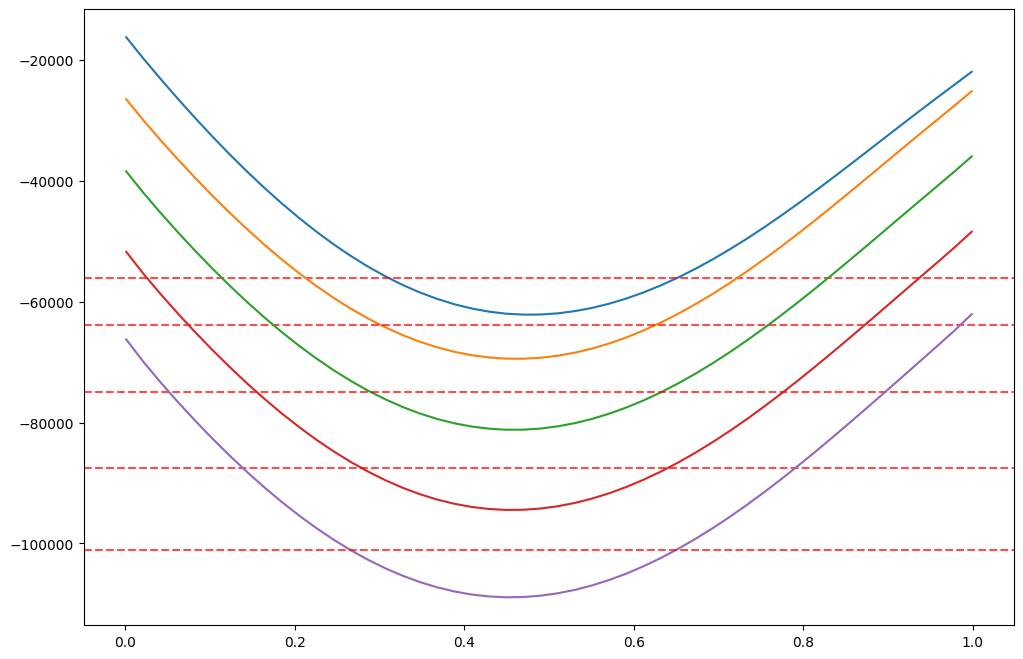

In [53]:
plt.figure(figsize=(12, 8))
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

    #plt.plot(x_al,G_gamma)
    plt.plot(x_al,G_gamma, label=f'γ phase, T={T}K')
    plt.axhline(y=G_gamma_prime, color='r', linestyle='--', alpha=0.7, label=f"γ' phase, T={T}K" if T == Temp[0] else "")

________________________________________________________________________________________________________
PROBLEM SET 2

Problem 3

In [9]:
#constants and initial values
wavelength = 1.5418 #in angstrom
twotheta_gamma_prime = np.array([24.73, 35.32, 43.66, 50.83, 57.40, 63.51, 74.81, 80.30, 85.63, 90.94, 96.25, 101.60, 107.10, 118.61])
twotheta_gamma = np.array([43.68, 50.84, 74.85, 90.97, 96.30, 118.68])

In [16]:
#calculating d
#grad to rad
def find_a(two_theta):
    #calculating theta in rad
    theta = np.radians(two_theta/2)
    #calculating d
    d = wavelength/(2*np.sin(theta))
    #setting a range for the values of lattice parameter, a, for testing
    a_test = np.linspace(3.50, 3.65, 1001) #this values are to have a range that covers tipycal lattice parameter vallues
    
    #calculating the error for the test values of a
    total_error = []
    for a in a_test:
        N_calc = (a/d)**2
        #difference of each value from the nearest integer
        error = np.sum((N_calc - np.round(N_calc))**2)
        total_error.append(error)
    
    #determining the best a value with the min error
    best_a_indx = np.argmin(total_error) #indice del min valor de a
    a_optim = a_test[best_a_indx] #valor de a optimo para el siguiente calculo

    #with the best a value, now we calculate N and find the a value for this N
    N = np.round((a_optim/d)**2).astype(int)
    a_new = d*np.sqrt(N) #nuevo valor para a para cada pico
    a = np.mean(a_new) #promedio de a de todos los picos

    #creating a dictionary with the hkl corresponding to N
    hkl_dict = {
        1: '100', 2: '110', 3: '111', 4: '200', 5: '210',
        6: '211', 8: '220', 9: '221', 10: '310', 11: '311',
        12: '222', 13: '320', 14: '321', 16: '400'
    }
    #extracting the hkl depending on the value of N obtained
    hkl = [hkl_dict.get(n, f'({n})') for n in N]
    
    #creating a dataframe to show the information
    results_df = pd.DataFrame({
        '2θ (deg)': two_theta,
        'd (Å)': d,
        'N': N,
        'hkl': hkl,
        'a (Å)': a,
        '1/d': 1/d
    })

    return a, results_df

In [17]:
#a value for gamma prime
#find_a(twotheta_gamma_prime)[1]
find_a(twotheta_gamma_prime)

(3.5892408596975325,
     2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0      24.73  3.600004   1  100  3.589241  0.277777
 1      35.32  2.541139   2  110  3.589241  0.393524
 2      43.66  2.073126   3  111  3.589241  0.482363
 3      50.83  1.796251   4  200  3.589241  0.556715
 4      57.40  1.605294   5  210  3.589241  0.622939
 5      63.51  1.464787   6  211  3.589241  0.682693
 6      74.81  1.269086   8  220  3.589241  0.787969
 7      80.30  1.195581   9  221  3.589241  0.836413
 8      85.63  1.134288  10  310  3.589241  0.881610
 9      90.94  1.081383  11  311  3.589241  0.924742
 10     96.25  1.035317  12  222  3.589241  0.965888
 11    101.60  0.994781  13  320  3.589241  1.005246
 12    107.10  0.958383  14  321  3.589241  1.043424
 13    118.61  0.896503  16  400  3.589241  1.115445)

In [18]:
#a value for gamma
find_a(twotheta_gamma)

(3.587381560268294,
    2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0     43.68  2.072223   3  111  3.587382  0.482574
 1     50.84  1.795921   4  200  3.587382  0.556817
 2     74.85  1.268507   8  220  3.587382  0.788328
 3     90.97  1.081105  11  311  3.587382  0.924980
 4     96.30  1.034912  12  222  3.587382  0.966265
 5    118.68  0.896178  16  400  3.587382  1.115850)

In [19]:
#gamma_prime = find_a(twotheta_gamma_prime)[1]
#gamma_prime["1/d"] = 1/gamma_prime["d (Å)"]
#gamma_prime

________________________________________________________________________________________________________
PROBLEM SET 3

Problem 1

In [ ]:
'''Problem 1'''
#parameter
R = np.linspace(0.1,1,1000) # set the values that R can take

In [23]:
#radial stress
sigma_radial_R = (5/15)*((101/100)-(1/(100*R**2))-R**2)
sigma_hoop_R = (5/15)*((101/100)-(1/(100*R**2))-((3/5)*R**2))

In [62]:
#finding the maximum values
max_radial = np.max(sigma_radial_R)
index_max_radial = R[np.argmax(sigma_radial_R)]
max_hoop = np.max(sigma_hoop_R)
index_max_hoop = R[np.argmax(sigma_hoop_R)]
max_vals = [max_radial, max_hoop]
max_vals

[0.26999999982212963, 0.28502686941930144]

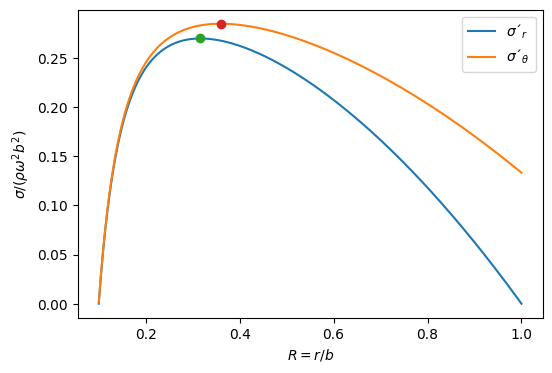

In [63]:
#Plotting the stresses and maximum
plt.figure(figsize=(6,4))
plt.plot(R, sigma_radial_R, label=r'$\sigma´_r$')
plt.plot(R, sigma_hoop_R, label=r'$\sigma´_\theta$')
plt.plot(index_max_radial,max_radial, 'o')
plt.plot(index_max_hoop,max_hoop, 'o')
plt.xlabel(r'$R=r/b$')
plt.ylabel(r'$\sigma/(\rho\omega^2 b^2)$')
plt.legend()
#plt.grid(True)
plt.savefig('stress.jpg')

Problem 3

In [ ]:
'''Problem 3'''

import statistics

#initial data
data = np.array([8821, 9276, 9946, 10592])
#revised data
new_data = np.array([8821, 9276, 9946, 10592, 8967])

In [ ]:
#equation for safe life
def safe_life(data):
    n=np.size(data)
    res = statistics.geometric_mean(data)/(2.449*(6**(1.645/(6*np.sqrt(n)))))
    return res

In [16]:
safe_life(data)

3077.6263729597613

In [17]:
safe_life(new_data)

3113.376882704013

In [18]:
np.mean(data)

9658.75

In [19]:
np.mean(new_data)

9520.4